In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import os
from os import listdir
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
import pathlib

data_dir = pathlib.Path("Resources/images/training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['flip' 'notflip']


In [3]:
# let's visulaize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    
    target_folder =target_dir +target_class

  # get a random image path
    random_image =random.sample(os.listdir(target_folder),1)
  # read  in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" +random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")
    return img

Image shape: (1920, 1080, 3)


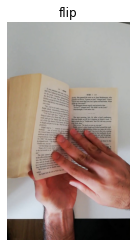

In [4]:
# View a random image from the training dataset
img =view_random_image(target_dir = "Resources/images/training/",
                       target_class = "flip")

Image shape: (1920, 1080, 3)


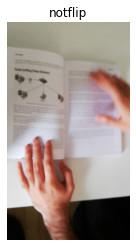

In [5]:
# View a random image from the training dataset
img =view_random_image(target_dir = "Resources/images/training/",
                       target_class = "notflip")

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


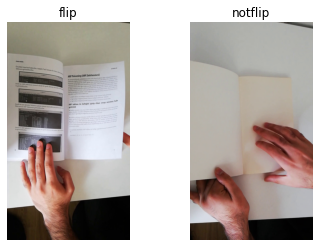

In [6]:
# visualize images
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("Resources/images/training/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("Resources/images/training/", "notflip")

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


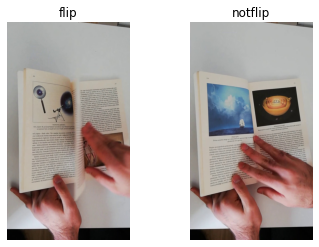

In [7]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("Resources/images/testing/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("Resources/images/testing/", "notflip")

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data(get all of the pixel values between 0 & 1 , also called normalization/scaling )
train_datagen  =ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir="Resources/images/training"
test_dir = "Resources/images/testing"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model
model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding="valid"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
                                                            
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1  = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data = valid_data,
                         validation_steps=len(valid_data))

Found 2392 images belonging to 2 classes.
Found 595 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 19 steps
Epoch 1/5
75/75 [==============================] - 209s 3s/step - loss: 0.6406 - accuracy: 0.6083 - val_loss: 0.5305 - val_accuracy: 0.7664
Epoch 2/5
75/75 [==============================] - 156s 2s/step - loss: 0.3283 - accuracy: 0.8625 - val_loss: 0.3135 - val_accuracy: 0.8824
Epoch 3/5
75/75 [==============================] - 144s 2s/step - loss: 0.1745 - accuracy: 0.9344 - val_loss: 0.1685 - val_accuracy: 0.9361
Epoch 4/5
75/75 [==============================] - 137s 2s/step - loss: 0.0643 - accuracy: 0.9783 - val_loss: 0.0861 - val_accuracy: 0.9613
Epoch 5/5
75/75 [==============================] - 137s 2s/step - loss: 0.0339 - accuracy: 0.9879 - val_loss: 0.0794 - val_accuracy: 0.9697


In [9]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [10]:
model_1.evaluate(valid_data)

  ...
    to  
  ['...']
19/19 [==============================] - 19s 1s/step - loss: 0.0794 - accuracy: 0.9697


[0.07941911859731925, 0.9697479]

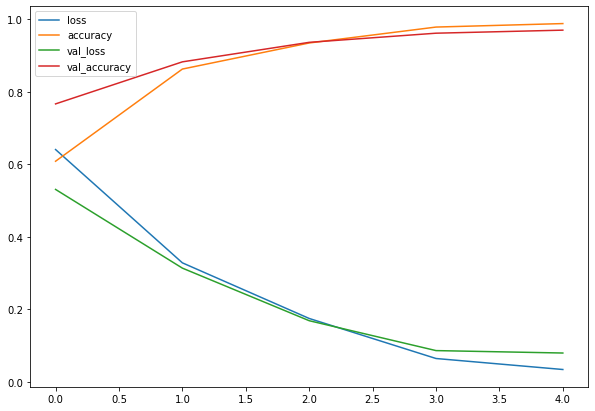

In [11]:

pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [12]:
def plot_loss_curves(history):
    
    """
    Returns separte loss curves for training and validation metrics.
    """
    loss= history.history["loss"]
    val_loss =history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs =range(len(history.history["loss"]))

  # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title('loss')
    plt.xlabel("epochs")
    plt.legend()

  # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

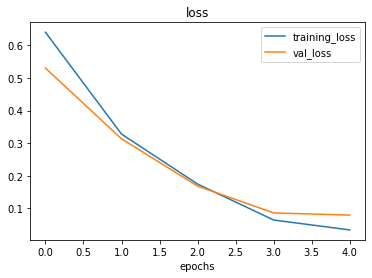

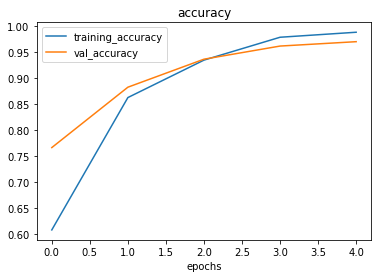

In [13]:
plot_loss_curves(history_1)

In [14]:
y_true = valid_data.classes
Y_pred = model_1.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

In [15]:
cm = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

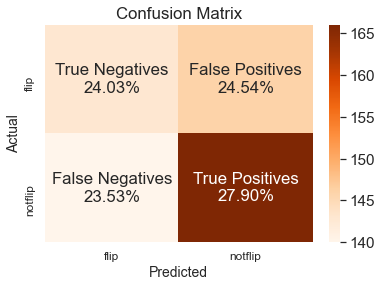

In [16]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [17]:
 ## Summary Statistics
TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
print(stats_summary)

[Summary Statistics]
Accuracy = 51.93% | Precision = 53.21% | Recall = 54.25% | Specificity = 49.48% | F1 Score = 53.72%
